# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

from IPython.core.display import display, HTML

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

### Configure Weather Map Api url

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_weather = []
record_counter = 1
set_counter = 1

print("Beginning Data Retrieval")
print("------------------------")
for city in cities:
    print(f"processing Record {record_counter} of Set {set_counter} | {city}")
    record_counter = record_counter + 1
    
    if record_counter % 50 == 0:
        set_counter = set_counter + 1
    
    
    response = requests.get(query_url + city)
    
    if response.status_code == 404:
        print('City not found. Skipping...')
    else:
        json = response.json()
        city_weather.append(dict({
            "city": json['name'],
            "Lat": json['coord']['lat'], 
            "Lng": json['coord']['lon'],
            "Max Temp": json['main']['temp_max'], 
            "Humidity": json['main']['humidity'],
            "Cloudiness": json['clouds']['all'], 
            "Wind Speed": json['wind']['speed'], 
            "Country": json['sys']['country'], 
            "Date": json['dt']}
        ))
        
print("-----------------------------")
print("Data Retrieval Complete")     
print("-----------------------------")
    

Beginning Data Retrieval
------------------------
processing Record 1 of Set 1 | mys shmidta
City not found. Skipping...
processing Record 2 of Set 1 | bredasdorp
processing Record 3 of Set 1 | chokurdakh
processing Record 4 of Set 1 | aksarka
processing Record 5 of Set 1 | faya
processing Record 6 of Set 1 | kapaa
processing Record 7 of Set 1 | tumannyy
City not found. Skipping...
processing Record 8 of Set 1 | puerto boyaca
processing Record 9 of Set 1 | punta arenas
processing Record 10 of Set 1 | san vicente
processing Record 11 of Set 1 | katsuura
processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
processing Record 13 of Set 1 | ishim
processing Record 14 of Set 1 | elk
processing Record 15 of Set 1 | saskylakh
processing Record 16 of Set 1 | mahebourg
processing Record 17 of Set 1 | saint-philippe
processing Record 18 of Set 1 | atuona
processing Record 19 of Set 1 | busselton
processing Record 20 of Set 1 | nizhneyansk
City not found. Skipping...
proces

processing Record 187 of Set 4 | beloha
processing Record 188 of Set 4 | sofiysk
City not found. Skipping...
processing Record 189 of Set 4 | narsaq
processing Record 190 of Set 4 | alyangula
processing Record 191 of Set 4 | issoire
processing Record 192 of Set 4 | morshansk
processing Record 193 of Set 4 | cabo san lucas
processing Record 194 of Set 4 | lufilufi
processing Record 195 of Set 4 | ciudad bolivar
processing Record 196 of Set 4 | natal
processing Record 197 of Set 4 | pisco
processing Record 198 of Set 4 | quimper
processing Record 199 of Set 4 | namatanai
processing Record 200 of Set 5 | severnyy
processing Record 201 of Set 5 | barentsburg
City not found. Skipping...
processing Record 202 of Set 5 | la ronge
processing Record 203 of Set 5 | tabuk
processing Record 204 of Set 5 | mareeba
processing Record 205 of Set 5 | carnarvon
processing Record 206 of Set 5 | geraldton
processing Record 207 of Set 5 | marinette
processing Record 208 of Set 5 | aykhal
processing Record 

processing Record 371 of Set 8 | katherine
processing Record 372 of Set 8 | korla
processing Record 373 of Set 8 | ambilobe
processing Record 374 of Set 8 | ostrovnoy
processing Record 375 of Set 8 | yenagoa
processing Record 376 of Set 8 | banda aceh
processing Record 377 of Set 8 | douglas
processing Record 378 of Set 8 | evensk
processing Record 379 of Set 8 | chenzhou
processing Record 380 of Set 8 | kulu
processing Record 381 of Set 8 | hualmay
processing Record 382 of Set 8 | tonila
processing Record 383 of Set 8 | chengde
processing Record 384 of Set 8 | kattivakkam
processing Record 385 of Set 8 | flinders
processing Record 386 of Set 8 | constitucion
processing Record 387 of Set 8 | samusu
City not found. Skipping...
processing Record 388 of Set 8 | chicama
processing Record 389 of Set 8 | stephenville
processing Record 390 of Set 8 | nicoya
processing Record 391 of Set 8 | homer
processing Record 392 of Set 8 | vilyuysk
processing Record 393 of Set 8 | padang
processing Recor

processing Record 554 of Set 12 | verkhoyansk
processing Record 555 of Set 12 | minsk
processing Record 556 of Set 12 | bastia
processing Record 557 of Set 12 | chambar
processing Record 558 of Set 12 | gorin
processing Record 559 of Set 12 | pacifica
processing Record 560 of Set 12 | teahupoo
processing Record 561 of Set 12 | panama city
processing Record 562 of Set 12 | rio gallegos
processing Record 563 of Set 12 | dukat
processing Record 564 of Set 12 | kangaatsiaq
processing Record 565 of Set 12 | minot
processing Record 566 of Set 12 | houma
processing Record 567 of Set 12 | xai-xai
processing Record 568 of Set 12 | bonnyville
processing Record 569 of Set 12 | neuquen
processing Record 570 of Set 12 | estelle
processing Record 571 of Set 12 | ossora
processing Record 572 of Set 12 | qasigiannguit
processing Record 573 of Set 12 | pevek
processing Record 574 of Set 12 | wanaka
processing Record 575 of Set 12 | ormara
processing Record 576 of Set 12 | namtsy
processing Record 577 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_weather_df = pd.DataFrame(city_weather)
city_weather_df.to_csv(output_data_file, index=False)
city_weather_df

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,54.28,87,16,3.42,ZA,1622680539
1,Chokurdakh,70.6333,147.9167,71.13,21,92,9.24,RU,1622680539
2,Aksarka,66.5606,67.7975,36.93,57,100,19.44,RU,1622680539
3,Faya,18.3851,42.4509,70.32,22,2,3.04,SA,1622680540
4,Kapaa,22.0752,-159.3190,84.18,69,1,1.99,US,1622680540
...,...,...,...,...,...,...,...,...,...
580,Santa Cruz de la Sierra,-17.8000,-63.1667,74.66,83,75,5.19,BO,1622680725
581,Champerico,14.3000,-91.9167,86.54,71,15,5.61,GT,1622680726
582,Bulnes,-36.7423,-72.2985,57.96,84,79,1.95,CL,1622680726
583,Chipata,-13.6333,32.6500,59.20,90,29,5.46,ZM,1622680726


In [6]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,5.850000e+02
mean,21.718248,14.601194,67.093983,68.996581,55.813675,7.456393,1.622681e+09
std,32.671967,90.791638,15.090630,20.714547,40.195130,4.960536,7.805311e+01
min,-54.800000,-175.200000,14.050000,9.000000,0.000000,0.000000,1.622680e+09
25%,-3.016700,-65.038500,56.860000,58.000000,12.000000,3.600000,1.622681e+09
50%,25.800000,20.040300,68.500000,74.000000,68.000000,6.060000,1.622681e+09
75%,48.941300,90.220100,79.050000,84.000000,98.000000,10.360000,1.622681e+09
max,78.218600,179.316700,102.630000,100.000000,100.000000,32.210000,1.622681e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
if (city_weather_df['Humidity'] > 100).any():
    display(HTML(city_weather_df[city_weather_df["Humidity"] > 100].describe().to_html()))


In [8]:
#  Get the indices of cities that have humidity over 100%.
humidity_outlier_index = []

if (city_weather_df['Humidity'] > 100).any():
    humidity_outlier_index = city_weather_df.index[city_weather_df['Humidity'] > 100 ].tolist()

humidity_outlier_index   

[]

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_City_data = pd.DataFrame([])

if (city_weather_df['Humidity'] > 100).any():
    humidity_outlier_index = df.index[df['Humidity'] > 100 ].tolist()
    clean_City_data = city_weather_df.drop(humidity_outlier_index, inplace=False)
else:
    clean_City_data = city_weather_df
    
clean_City_data

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.5322,20.0403,54.28,87,16,3.42,ZA,1622680539
1,Chokurdakh,70.6333,147.9167,71.13,21,92,9.24,RU,1622680539
2,Aksarka,66.5606,67.7975,36.93,57,100,19.44,RU,1622680539
3,Faya,18.3851,42.4509,70.32,22,2,3.04,SA,1622680540
4,Kapaa,22.0752,-159.3190,84.18,69,1,1.99,US,1622680540
...,...,...,...,...,...,...,...,...,...
580,Santa Cruz de la Sierra,-17.8000,-63.1667,74.66,83,75,5.19,BO,1622680725
581,Champerico,14.3000,-91.9167,86.54,71,15,5.61,GT,1622680726
582,Bulnes,-36.7423,-72.2985,57.96,84,79,1.95,CL,1622680726
583,Chipata,-13.6333,32.6500,59.20,90,29,5.46,ZM,1622680726


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

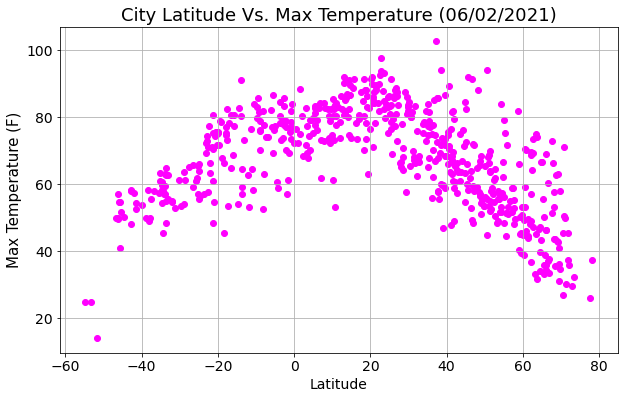

In [40]:
graph, graph_axes = plt.subplots(figsize=(10,6))
graph_axes.scatter(clean_City_data["Lat"], 
                   clean_City_data["Max Temp"], color='magenta')
                                                         
graph_axes.set_title("City Latitude Vs. Max Temperature (" + pd.to_datetime("today").strftime("%m/%d/%Y") + ")" , fontsize=18)
graph_axes.set_ylabel("Max Temperature (F)", fontsize=15);
graph_axes.set_xlabel("Latitude", fontsize=14);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.savefig('output_data/Latitude_Vs_Temperature_Scatter.png', 
            bbox_inches="tight",
            dpi=300,
            facecolor='ghostwhite')
plt.show()   

## Latitude vs. Humidity Plot

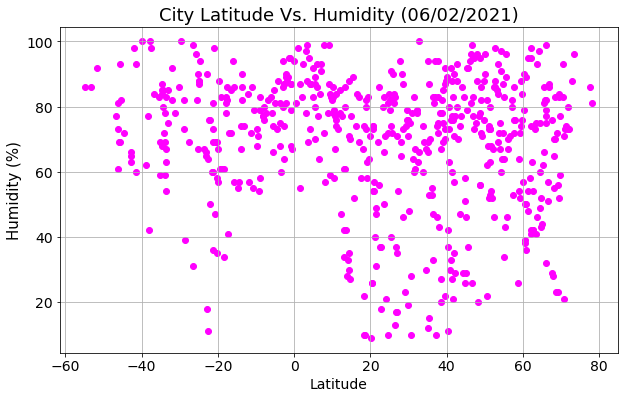

In [41]:
graph, graph_axes = plt.subplots(figsize=(10,6))
graph_axes.scatter(clean_City_data["Lat"], 
                   clean_City_data["Humidity"], color='magenta')
                                                         
graph_axes.set_title("City Latitude Vs. Humidity (" + pd.to_datetime("today").strftime("%m/%d/%Y") + ")" , fontsize=18)
graph_axes.set_ylabel("Humidity (%)", fontsize=15);
graph_axes.set_xlabel("Latitude", fontsize=14);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt. savefig('output_data/Latitude_Vs_Humidity_Scatter.png', 
            bbox_inches="tight",
            dpi=300,
            facecolor='ghostwhite')
plt.show()

## Latitude vs. Cloudiness Plot

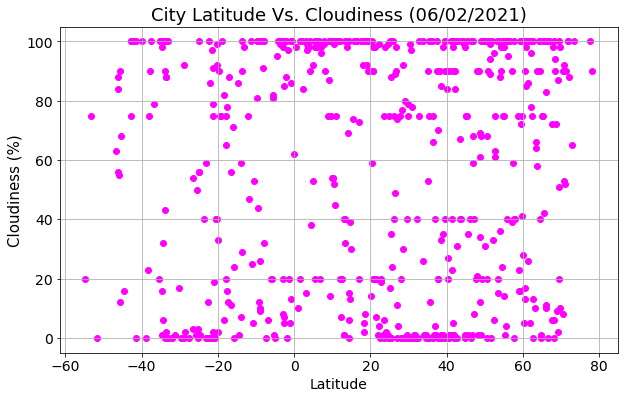

In [42]:
graph, graph_axes = plt.subplots(figsize=(10,6))
graph_axes.scatter(clean_City_data["Lat"], 
                   clean_City_data["Cloudiness"], color='magenta')
                                                         
graph_axes.set_title("City Latitude Vs. Cloudiness (" + pd.to_datetime("today").strftime("%m/%d/%Y") + ")" , fontsize=18)
graph_axes.set_ylabel("Cloudiness (%)", fontsize=15);
graph_axes.set_xlabel("Latitude", fontsize=14);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt. savefig('output_data/Latitude_Vs_Cloudiness_Scatter.png', 
            bbox_inches="tight",
            dpi=300,
            facecolor='ghostwhite')
plt.show()

## Latitude vs. Wind Speed Plot

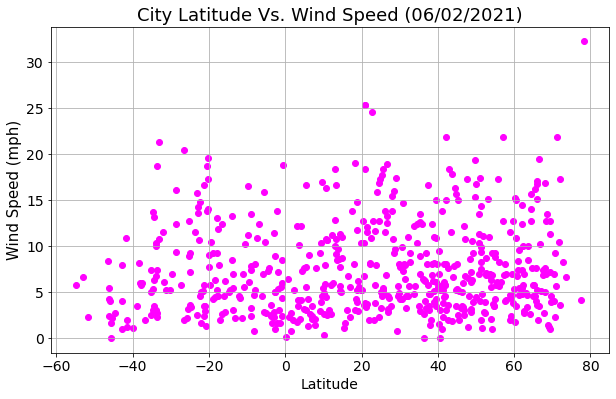

In [43]:
graph, graph_axes = plt.subplots(figsize=(10,6))
graph_axes.scatter(clean_City_data["Lat"], 
                   clean_City_data["Wind Speed"], color='magenta')
                                                         
graph_axes.set_title("City Latitude Vs. Wind Speed (" + pd.to_datetime("today").strftime("%m/%d/%Y") + ")" , fontsize=18)
graph_axes.set_ylabel("Wind Speed (mph)", fontsize=15);
graph_axes.set_xlabel("Latitude", fontsize=14);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt. savefig('output_data/Latitude_Vs_WindSpeed_Scatter.png', 
            bbox_inches="tight",
            dpi=300,
            facecolor='ghostwhite')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.7403708773901783 


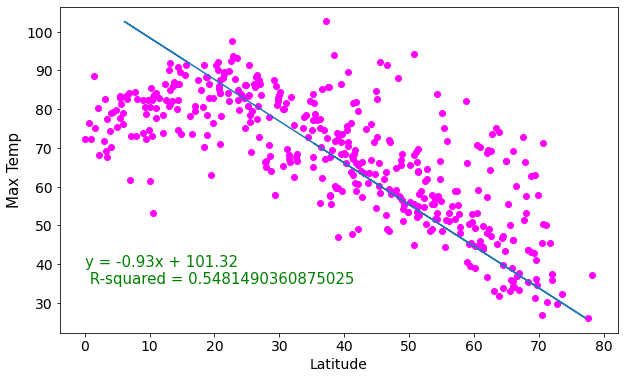

In [14]:
clean_City_data_northern_hemisphere = clean_City_data[clean_City_data["Lat"] > 0]

correlation_coefficent = clean_City_data_northern_hemisphere["Lat"].corr(
clean_City_data_northern_hemisphere["Max Temp"])

print(f"The r-value is: {correlation_coefficent} ")

max_temps = clean_City_data_northern_hemisphere["Max Temp"]
northern_latitudes = clean_City_data_northern_hemisphere["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(max_temps, northern_latitudes)
regress_values = max_temps * slope + intercept
regress_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "\n R-squared = " + str(rvalue**2)

graph, graph_axes = plt.subplots(figsize=(10,6))
graph_axes.scatter(northern_latitudes, max_temps, color='magenta')
graph_axes.plot(regress_values, max_temps)

graph_axes.annotate(regress_equation,(0,35), fontsize=15, color="green")
graph_axes.set_ylabel("Max Temp", fontsize=15);
graph_axes.set_xlabel("Latitude", fontsize=14);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7380712231240663 


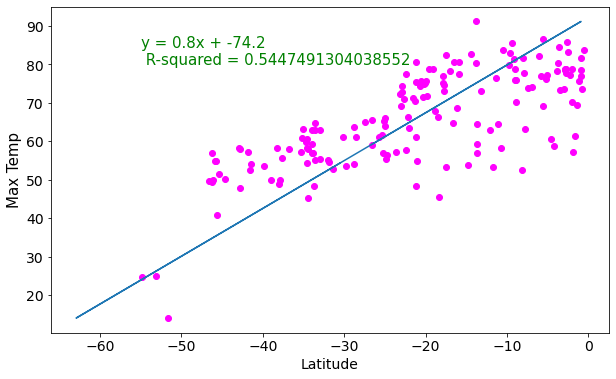

In [15]:
clean_City_data_southern_hemisphere = clean_City_data[clean_City_data["Lat"] < 0]

correlation_coefficent = clean_City_data_southern_hemisphere["Max Temp"].corr(
clean_City_data_southern_hemisphere["Lat"])

print(f"The r-value is: {correlation_coefficent} ")

max_temps = clean_City_data_southern_hemisphere["Max Temp"]
southern_latitudes = clean_City_data_southern_hemisphere["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(max_temps, southern_latitudes)
regress_values = max_temps * slope + intercept
regress_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "\n R-squared = " + str(rvalue**2)

graph, graph_axes = plt.subplots(figsize=(10,6))
graph_axes.scatter(southern_latitudes, max_temps, color='magenta')
graph_axes.plot(regress_values, max_temps)

graph_axes.annotate(regress_equation,(-55,80), fontsize=15, color="green")
graph_axes.set_ylabel("Max Temp", fontsize=15);
graph_axes.set_xlabel("Latitude", fontsize=14);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.03255282647635625 


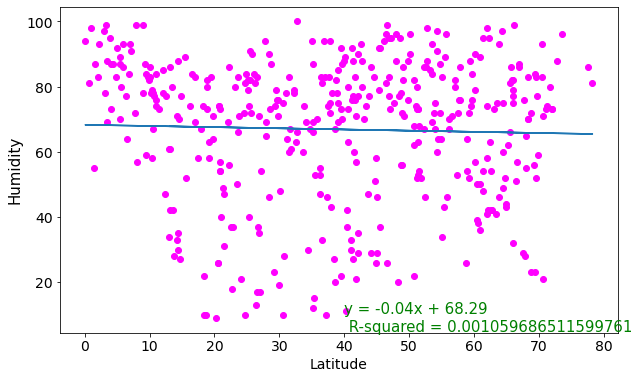

In [17]:
correlation_coefficent = clean_City_data_northern_hemisphere["Lat"].corr(
clean_City_data_northern_hemisphere["Humidity"])

print(f"The r-value is: {correlation_coefficent} ")

humidity = clean_City_data_northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitudes, humidity)
regress_values = northern_latitudes * slope + intercept
regress_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "\n R-squared = " + str(rvalue**2)

graph, graph_axes = plt.subplots(figsize=(10,6))
graph_axes.scatter(northern_latitudes, humidity, color='magenta')
graph_axes.plot(northern_latitudes, regress_values)

graph_axes.annotate(regress_equation,(40,5), fontsize=15, color="green")
graph_axes.set_ylabel("Humidity", fontsize=15);
graph_axes.set_xlabel("Latitude", fontsize=14);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.022018353773020947 


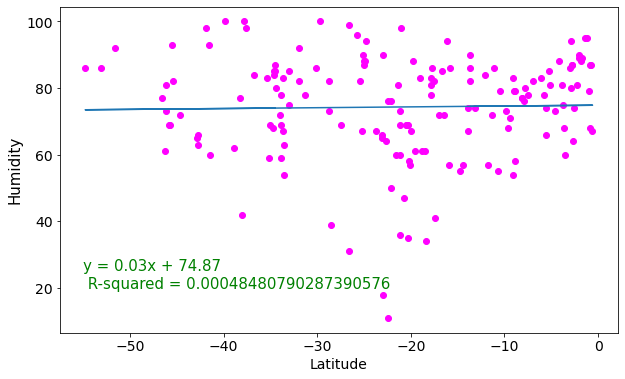

In [18]:
correlation_coefficent = clean_City_data_southern_hemisphere["Lat"].corr(
clean_City_data_southern_hemisphere["Humidity"])

print(f"The r-value is: {correlation_coefficent} ")

humidity = clean_City_data_southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitudes, humidity)
regress_values = southern_latitudes * slope + intercept
regress_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "\n R-squared = " + str(rvalue**2)

graph, graph_axes = plt.subplots(figsize=(10,6))
graph_axes.scatter(southern_latitudes, humidity, color='magenta')
graph_axes.plot(southern_latitudes, regress_values)

graph_axes.annotate(regress_equation,(-55,20), fontsize=15, color="green")
graph_axes.set_ylabel("Humidity", fontsize=15);
graph_axes.set_xlabel("Latitude", fontsize=14);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.013989315653060134 


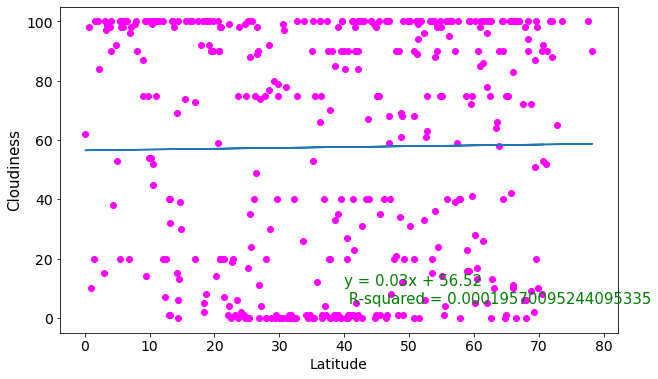

In [19]:
correlation_coefficent = clean_City_data_northern_hemisphere["Lat"].corr(
clean_City_data_northern_hemisphere["Cloudiness"])

print(f"The r-value is: {correlation_coefficent} ")

cloudiness = clean_City_data_northern_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitudes, cloudiness)
regress_values = northern_latitudes * slope + intercept
regress_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "\n R-squared = " + str(rvalue**2)

graph, graph_axes = plt.subplots(figsize=(10,6))
graph_axes.scatter(northern_latitudes, cloudiness, color='magenta')
graph_axes.plot(northern_latitudes, regress_values)

graph_axes.annotate(regress_equation,(40,5), fontsize=15, color="green")
graph_axes.set_ylabel("Cloudiness", fontsize=15);
graph_axes.set_xlabel("Latitude", fontsize=14);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.043265613064579406 


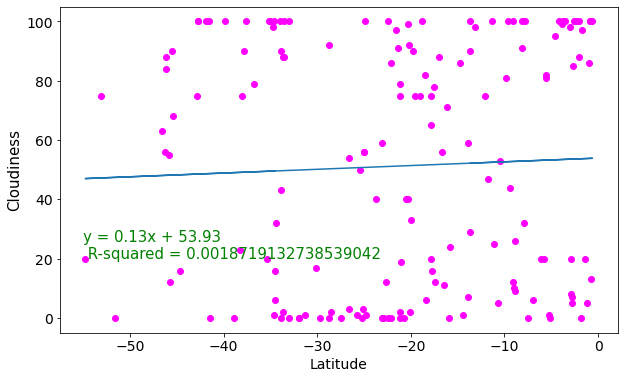

In [20]:
correlation_coefficent = clean_City_data_southern_hemisphere["Lat"].corr(
clean_City_data_southern_hemisphere["Cloudiness"])

print(f"The r-value is: {correlation_coefficent} ")

cloudiness = clean_City_data_southern_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitudes, cloudiness)
regress_values = southern_latitudes * slope + intercept
regress_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "\n R-squared = " + str(rvalue**2)

graph, graph_axes = plt.subplots(figsize=(10,6))
graph_axes.scatter(southern_latitudes, cloudiness, color='magenta')
graph_axes.plot(southern_latitudes, regress_values)

graph_axes.annotate(regress_equation,(-55,20), fontsize=15, color="green")
graph_axes.set_ylabel("Cloudiness", fontsize=15);
graph_axes.set_xlabel("Latitude", fontsize=14);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.05850565541461076 


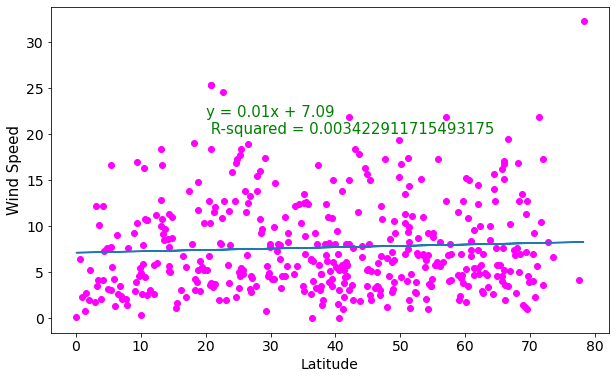

In [21]:
correlation_coefficent = clean_City_data_northern_hemisphere["Lat"].corr(
clean_City_data_northern_hemisphere["Wind Speed"])

print(f"The r-value is: {correlation_coefficent} ")

wind_speed = clean_City_data_northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_latitudes, wind_speed)
regress_values = northern_latitudes * slope + intercept
regress_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "\n R-squared = " + str(rvalue**2)

graph, graph_axes = plt.subplots(figsize=(10,6))
graph_axes.scatter(northern_latitudes, wind_speed, color='magenta')
graph_axes.plot(northern_latitudes, regress_values)

graph_axes.annotate(regress_equation,(20,20), fontsize=15, color="green")
graph_axes.set_ylabel("Wind Speed", fontsize=15);
graph_axes.set_xlabel("Latitude", fontsize=14);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.053258918113619665 


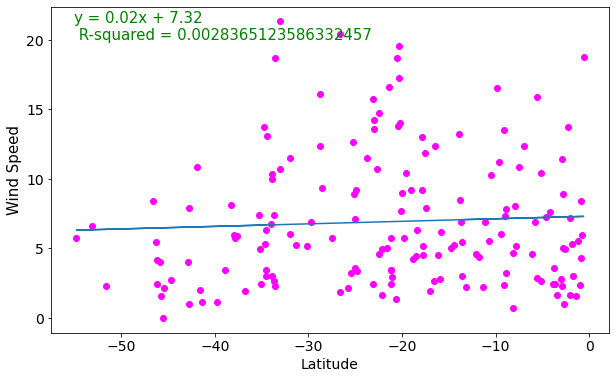

In [23]:
correlation_coefficent = clean_City_data_southern_hemisphere["Lat"].corr(
clean_City_data_southern_hemisphere["Wind Speed"])

print(f"The r-value is: {correlation_coefficent} ")

wind_speed = clean_City_data_southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_latitudes, wind_speed)
regress_values = southern_latitudes * slope + intercept
regress_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "\n R-squared = " + str(rvalue**2)

graph, graph_axes = plt.subplots(figsize=(10,6))
graph_axes.scatter(southern_latitudes, wind_speed, color='magenta')
graph_axes.plot(southern_latitudes, regress_values)

graph_axes.annotate(regress_equation,(-55,20), fontsize=15, color="green")
graph_axes.set_ylabel("Wind Speed", fontsize=15);
graph_axes.set_xlabel("Latitude", fontsize=14);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

#### Data Analysis
----

* Observed that the trendline steadily decreases for maximum temperatures on the nothern hemisphere as we go further north from the equator
* Observed that the trendline steadily increases for maximum temperatures on the southern hemisphere as we go further north towards the equator
* Latitude has very minimal effect on Humidity and Cloudiness 

#### Reasoning
* It is hot near the equator and as we go towards the north pole the maximum temperature decreases. We see this very clearly from our maximum temperature vs northern hemisphere linear regression analysis
* Similarly it is hot near the equator and we go towards the south pole the maximum temperature decreases. We see this very clearly from our maximum temperatures vs southern hemisphere linear regression analysis
* brrrrrr .. it is very cold at the poles. brrrrrr!! 
* Humidity and cloudiness seems to not have much affect on latitude evident from our analysis. They depend on multiple factors like pressure, temperature and windspeed. 